In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
root_directory = '/content/drive/MyDrive/Capstone Project/Machine Learning/Dataset/cat_and_dog'

In [3]:
import warnings
warnings.filterwarnings('ignore')
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# **MODEL**

In [ ]:
# Define the training and validation base directories
train_dir = root_directory + "/train"
validation_dir = root_directory + "/test"

# Directory with training british_shorthair pictures
train_british_shorthair_dir = os.path.join(train_dir, 'british_shorthair')
# Directory with training persian pictures
train_persian_dir = os.path.join(train_dir, 'persian')
# Directory with training sphynx pictures
train_sphynx_dir = os.path.join(train_dir, 'sphynx')
# Directory with validation british_shorthair pictures
validation_british_shorthair_dir = os.path.join(validation_dir, 'british_shorthair')
# Directory with validation persian pictures
validation_persian_dir = os.path.join(validation_dir, 'persian')
# Directory with validation sphynx pictures
validation_sphynx_dir = os.path.join(validation_dir, 'sphynx')

# Check the number of images for each class and set
print(f"There are {len(os.listdir(train_british_shorthair_dir))} images of british_shorthair for training.\n")
print(f"There are {len(os.listdir(train_persian_dir))} images of persian for training.\n")
print(f"There are {len(os.listdir(train_sphynx_dir))} images of sphynx for training.\n")
print(f"There are {len(os.listdir(validation_british_shorthair_dir))} images of british_shorthair for validation.\n")
print(f"There are {len(os.listdir(validation_persian_dir))} images of persian for validation.\n")
print(f"There are {len(os.listdir(validation_sphynx_dir))} images of sphynx for validation.\n")

There are 140 images of british_shorthair for training.

There are 140 images of persian for training.

There are 140 images of sphynx for training.

There are 60 images of british_shorthair for validation.

There are 60 images of persian for validation.

There are 60 images of sphynx for validation.



In [ ]:
# Define the training and validation base directories
train_dir = root_directory + "/train"
validation_dir = root_directory + "/test"

# Directory with training chihuahua pictures
train_chihuahua_dir = os.path.join(train_dir, 'chihuahua')
# Directory with training golden_retriever pictures
train_golden_retriever_dir = os.path.join(train_dir, 'golden_retriever')
# Directory with training poodle pictures
train_poodle_dir = os.path.join(train_dir, 'poodle')
# Directory with validation chihuahua pictures
validation_chihuahua_dir = os.path.join(validation_dir, 'chihuahua')
# Directory with validation golden_retriever pictures
validation_golden_retriever_dir = os.path.join(validation_dir, 'golden_retriever')
# Directory with validation poodle pictures
validation_poodle_dir = os.path.join(validation_dir, 'poodle')

# Check the number of images for each class and set
print(f"There are {len(os.listdir(train_chihuahua_dir))} images of chihuahua for training.\n")
print(f"There are {len(os.listdir(train_golden_retriever_dir))} images of golden_retriever for training.\n")
print(f"There are {len(os.listdir(train_poodle_dir))} images of poodle for training.\n")
print(f"There are {len(os.listdir(validation_chihuahua_dir))} images of chihuahua for validation.\n")
print(f"There are {len(os.listdir(validation_golden_retriever_dir))} images of golden_retriever for validation.\n")
print(f"There are {len(os.listdir(validation_poodle_dir))} images of poodle for validation.\n")

There are 140 images of chihuahua for training.

There are 160 images of golden_retriever for training.

There are 140 images of poodle for training.

There are 60 images of chihuahua for validation.

There are 60 images of golden_retriever for validation.

There are 60 images of poodle for validation.



Sample british_shorthair image:


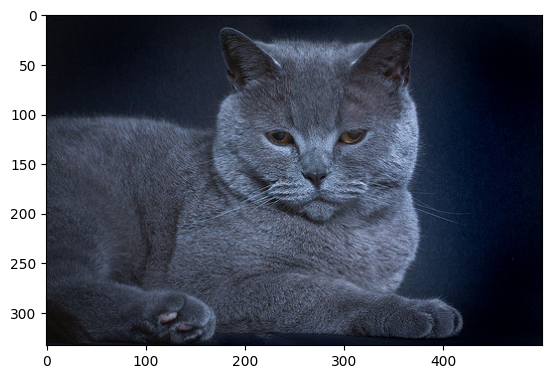


Sample persian image:


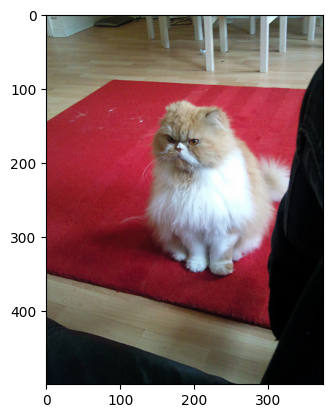


Sample sphynx image:


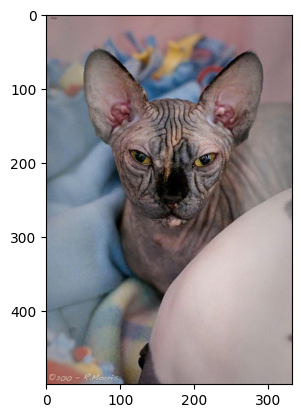

In [ ]:
print("Sample british_shorthair image:")
plt.imshow(load_img(f"{os.path.join(train_british_shorthair_dir, os.listdir(train_british_shorthair_dir)[0])}"))
plt.show()

print("\nSample persian image:")
plt.imshow(load_img(f"{os.path.join(train_persian_dir, os.listdir(train_persian_dir)[0])}"))
plt.show()

print("\nSample sphynx image:")
plt.imshow(load_img(f"{os.path.join(train_sphynx_dir, os.listdir(train_sphynx_dir)[0])}"))
plt.show()

Sample chihuahua image:


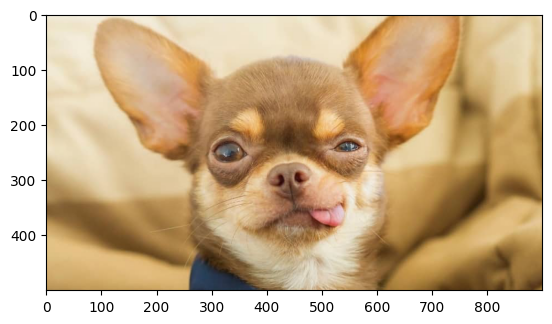


Sample golden_retriever image:


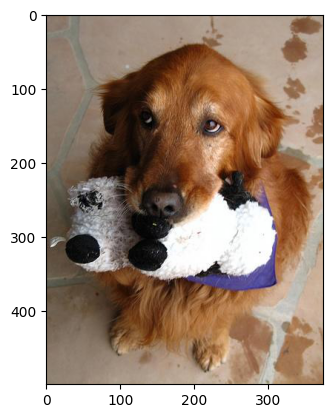


Sample poodle image:


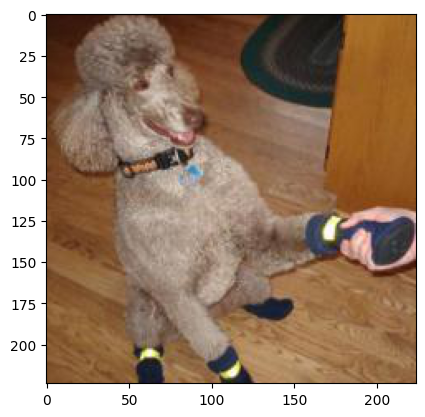

In [ ]:
print("Sample chihuahua image:")
plt.imshow(load_img(f"{os.path.join(train_chihuahua_dir, os.listdir(train_chihuahua_dir)[0])}"))
plt.show()

print("\nSample golden_retriever image:")
plt.imshow(load_img(f"{os.path.join(train_golden_retriever_dir, os.listdir(train_golden_retriever_dir)[0])}"))
plt.show()

print("\nSample poodle image:")
plt.imshow(load_img(f"{os.path.join(train_poodle_dir, os.listdir(train_poodle_dir)[0])}"))
plt.show()

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  ### START CODE HERE
  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1.0/255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=64,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen =  ImageDataGenerator(rescale=1.0/255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=64,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(train_dir, validation_dir)

Found 860 images belonging to 6 classes.
Found 360 images belonging to 6 classes.


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-05-15 08:27:16--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.107.128, 173.194.213.128, 74.125.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   145MB/s    in 0.6s    

2023-05-15 08:27:17 (145 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
def create_pre_trained_model(local_weights_file, include_top=False):
  ### START CODE HERE
  pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                  include_top = False, 
                                  weights = None) 

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False

  ### END CODE HERE

  return pre_trained_model

In [ ]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [ ]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
def output_of_last_layer(pre_trained_model):
  ### START CODE HERE
  last_desired_layer = pre_trained_model.get_layer('mixed7') 
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)
  ### END CODE HERE

  return last_output

In [ ]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 7, 7, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [ ]:
# Print the type of the pre-trained model
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.engine.functional.Functional'>


In [ ]:
def create_final_model(pre_trained_model, last_output):
  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(last_output)

  ### START CODE HERE

  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = layers.Dense(1024, activation = tf.nn.relu)(x)
  # Add a dropout rate of 0.2
  x = layers.Dropout(0.2)(x)  
  # Add a final sigmoid layer for classification
  x = layers.Dense(6, activation = tf.nn.softmax)(x)        

  # Create the complete model by using the Model class
  model = Model(pre_trained_model.input, x)

  # Compile the model
  model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

  ### END CODE HERE
  
  return model

In [ ]:
# Save your model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 47,517,606 total parameters in this model.
There are 38,542,342 trainable parameters in this model.


In [ ]:
# Run this and see how many epochs it should take before the callback
# fires, and stops training at 99.9% accuracy
# (It should take a few epochs)
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 100,
                    verbose = 2,
                    callbacks=callbacks)

Epoch 1/100
14/14 - 247s - loss: 1.4988 - accuracy: 0.5791 - val_loss: 0.5057 - val_accuracy: 0.8417 - 247s/epoch - 18s/step
Epoch 2/100
14/14 - 98s - loss: 0.4513 - accuracy: 0.8442 - val_loss: 0.5738 - val_accuracy: 0.7806 - 98s/epoch - 7s/step
Epoch 3/100
14/14 - 77s - loss: 0.3536 - accuracy: 0.8756 - val_loss: 0.3331 - val_accuracy: 0.8722 - 77s/epoch - 6s/step
Epoch 4/100
14/14 - 96s - loss: 0.3084 - accuracy: 0.8953 - val_loss: 0.2732 - val_accuracy: 0.8972 - 96s/epoch - 7s/step
Epoch 5/100
14/14 - 77s - loss: 0.2522 - accuracy: 0.9058 - val_loss: 0.2599 - val_accuracy: 0.9111 - 77s/epoch - 6s/step
Epoch 6/100
14/14 - 102s - loss: 0.2146 - accuracy: 0.9221 - val_loss: 0.2676 - val_accuracy: 0.9083 - 102s/epoch - 7s/step
Epoch 7/100
14/14 - 96s - loss: 0.2121 - accuracy: 0.9302 - val_loss: 0.2292 - val_accuracy: 0.9083 - 96s/epoch - 7s/step
Epoch 8/100
14/14 - 78s - loss: 0.2064 - accuracy: 0.9244 - val_loss: 0.2467 - val_accuracy: 0.9111 - 78s/epoch - 6s/step
Epoch 9/100
14/14 -

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Capstone Project/Machine Learning/model.hdf5')

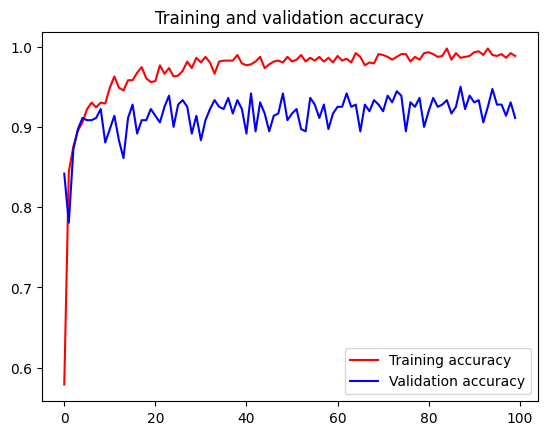

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  x = x*1.0/255.0

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving BREED Hero_0096_poodle_toy.jpeg to BREED Hero_0096_poodle_toy.jpeg
1/1 [==============================] - 1s 1s/step
BREED Hero_0096_poodle_toy.jpeg
[[1.4518368e-13 1.0960677e-08 3.5323053e-05 2.1940552e-09 9.9996471e-01
  5.8346978e-17]]


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  x = x*1.0/255.0

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving Persian-cat-compressed.jpeg to Persian-cat-compressed.jpeg
1/1 [==============================] - 0s 87ms/step
Persian-cat-compressed.jpeg
[[5.2230580e-09 2.1796338e-09 6.8126799e-14 1.0000000e+00 6.1837466e-11
  2.7991467e-10]]


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  x = x*1.0/255.0

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving cropped-gambar-British-Shorthair.jpeg to cropped-gambar-British-Shorthair.jpeg
1/1 [==============================] - 0s 89ms/step
cropped-gambar-British-Shorthair.jpeg
[[1.0000000e+00 1.5297811e-16 4.9536760e-19 3.6895410e-11 9.8772396e-16
  1.5597682e-13]]


# **DEPLOYMENT**

Saving GreekSphynxCat1.png to GreekSphynxCat1 (6).png


1/1 [==============================] - 1s 1s/step


GreekSphynxCat1.png
Sphynx 99.92%


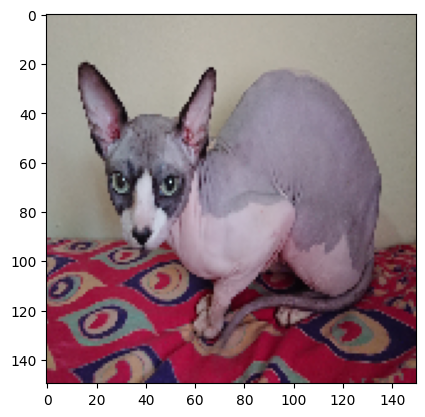

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Capstone Project/Machine Learning/model.hdf5', compile=False)

uploaded = files.upload()
labels = ['British Shorthair', 'Chihuahua', 'Golden Retriver', 'Persian', 'Poodle', 'Sphynx']

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  plt.imshow(img)
  x = np.expand_dims(x, axis=0)

  x = x*1.0/255.0

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  acc = np.max(classes)
  pred = labels[np.argmax(classes)]

  print('\n')
  print(fn)
  print(pred, "{:.2%}".format(acc))

In [ ]:
import numpy as np
import itertools

model = load_model('/content/drive/MyDrive/Capstone Project/Machine Learning/model.hdf5', compile=False)

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# On test dataset
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['British Shorthair', 'Chihuahua', 'Golden Retriver', 'Persian', 'Poodle', 'Sphynx']

# Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

# Classification Report
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))